# Case 

# Penyelesaian 

Jika dilihat dari apa yg diinginkan Dimas, maka kita dapat menggunakan metode MLR dikarenakan memiliki lebih dari 1 variabel bebas.
- Variabel bebas disini yaitu kriteria yg diinginkan Dimas
- Variabel terikatnya adalah harga

# Langkah-langkah penyelesaian

## Import library yg diperlukan

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# hapus kolom id
df.drop(['id','date','sqft_lot','view','condition','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1,inplace=True)
# karena tidak diperlukan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
 6   grade        21613 non-null  int64  
 7   yr_built     21613 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [5]:
# hapus kolom id
df.drop(['floors','waterfront'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


Penjelasan :
 - Price : harga rumah (US$)
 - bedrooms : jumlah kamar tidur
 - bathrooms : jumlah kamar mandi
 - sqft_living : luas rumah dalam satuan sqft
 - grade : grading system dari pemerintah king county US

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0
yr_built,21613.0,1971.005136,29.373411,1900.0,1951.00,1975.00,1997.0,2015.0


- Pada feature bathrooms terdapat nilai pecahan, maka ubah dulu jenisdatanya ke int
- pada feature bedrooms terdapat nilai33, jadi kemungkinan itu typo dan akan diganti 3

In [8]:
# ubah tipe data dari bathrooms yg semula float ke int
df['bathrooms'] = df['bathrooms'].astype('int')

In [9]:
# ganti nilai 33 menjadi 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  int32  
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 928.8 KB


# Handing NA

In [11]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

# EDA

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


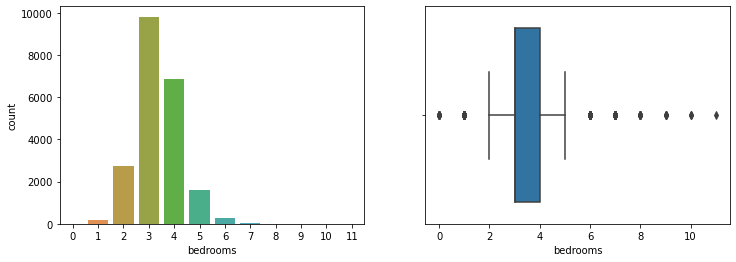

In [13]:
# analisis univariate bedrooms
# distribusi bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
sns.boxplot(df['bedrooms'])
plt.show()

- Sebagian besar jumlah kamar tidur di angka 3 dan 4
- banyak outliers

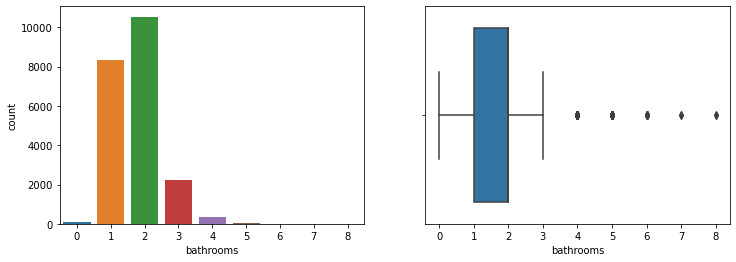

In [14]:
# analisis univariate bathrooms
# distribusi bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
sns.boxplot(df['bathrooms'])
plt.show()

- Jumlah kmar mandi paling banyak berada pada angka 1 dan 2
- Ternyata ada rumah yg tidak ada kamar mandinya 
- Outliers lumayan banyak

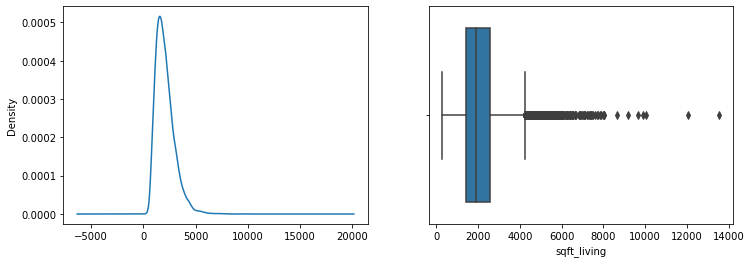

In [15]:
# analisis univariate sqft_living
# distribusi sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
sns.boxplot(df['sqft_living'])
plt.show()

- density dan distribusi luas rumah berada di sekitar angka 2000an
- outliers banyak juga

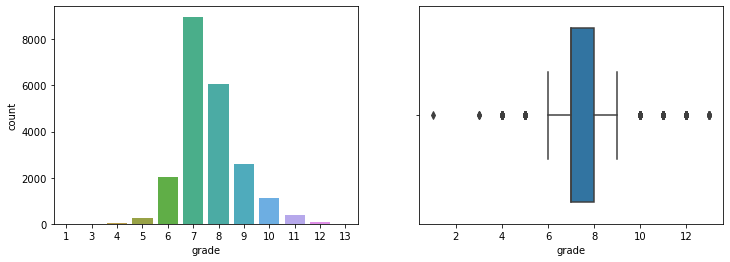

In [16]:
# analisis univariate grade
# distribusi grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
sns.boxplot(df['grade'])
plt.show()

- Sebagian besar rumah di County King US memiliki grade 7 dan 8
- Dilihat dari boxplot data memiliki beberapa outliers

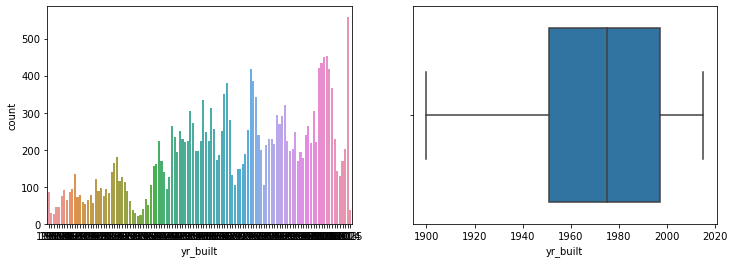

In [17]:
# analisis univariate yr_built
# distribusi grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
sns.boxplot(df['yr_built'])
plt.show()

- Semakin tua umur rumah maka semakin sedikit orang yg menjual rumah tsb
- density terdapat disekitar tahun 1980an
- tidak ada outliers

<Figure size 720x576 with 0 Axes>

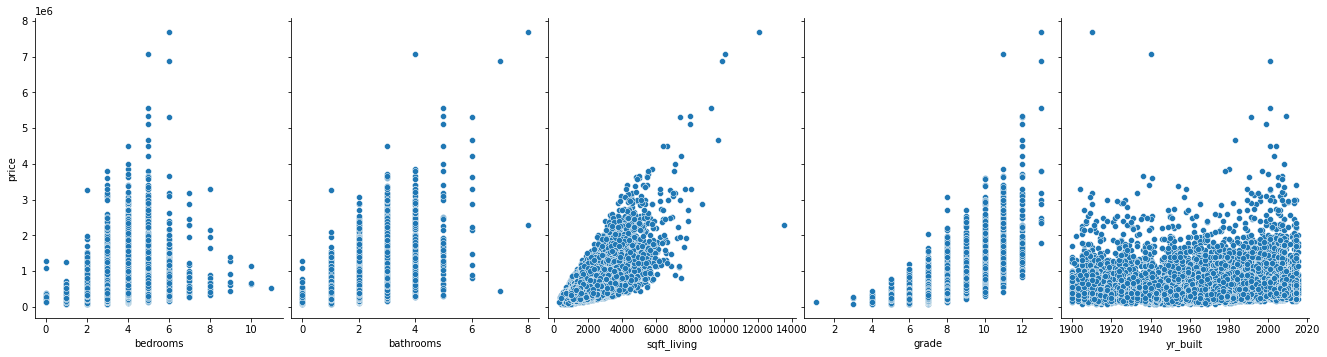

In [18]:
# Analisis bivariate antara independent variable dan dependent variable
# hubungan antar independetn-dependent
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms','bathrooms','sqft_living','grade','yr_built'], y_vars=['price'],
            size=5, aspect=0.75)
plt.show()

Hubungan bermacam-macam, ada yg tidak mempunyai korelasi ada yg punya korelasi positif. Yg paling kuat sqft_living

In [19]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.000000,0.315438,0.510072,0.702035,0.667434,0.054012
bedrooms,0.315438,1.000000,0.480389,0.591471,0.366509,0.159180
bathrooms,0.510072,0.480389,1.000000,0.697875,0.606631,0.433647
sqft_living,0.702035,0.591471,0.697875,1.000000,0.762704,0.318049
grade,0.667434,0.366509,0.606631,0.762704,1.000000,0.446963
yr_built,0.054012,0.159180,0.433647,0.318049,0.446963,1.000000


- Dari tabel diatas dapat dilihat bahwa sqft_living mempunyai hubungan linear positif yg kuat dg price
- Nilai korelasi yr_built hampir mendekati 0 yg menandakan bahwa usia rumah tidak berpengaruh pada harga

# Modelling

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [21]:
# Pertama, buat variabel x dan y
X = df.drop(columns='price')
y = df['price']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Kedua, split data menjadi training dan testing dg porsi 80/20
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [24]:
## cek bentuk data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 5)
(4323, 5)
(17290,)
(4323,)


In [25]:
# Ketiga, bikin objek linear regresi
lin_reg = LinearRegression()

In [26]:
# Keempat, train model menggunakan training data yg udah displit
lin_reg.fit(X_train,y_train)

LinearRegression()

In [27]:
# Kelima, cari tahu nilai koefisien(m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790616    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717709


In [28]:
# Buat kolom dataframe agar lebih rapih
coef_dict={
    'features' : X.columns,
    'coef_value' : lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


Nilai m dan b diatas kalau dimasukan ke dalam rumus menjadi
- Y = -53061.754643x1 + 188.909263x2 + 188.909263x3 + 131290.895368x4 - 3969.558315 + 7031568.245717709

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
Model = LinearRegression(fit_intercept=True)

In [80]:
Model.fit(X_train,y_train)

LinearRegression()

Quick Evaluation Matrix

In [81]:
Model.score(X_train,y_train)
# melakukan penilaian/evaluation matrix train set

0.6188434181757463

In [82]:
Model.score(X_test,y_test)
# melakukan penilaian/evaluation matrix test set

0.6125113286941102

In [83]:
Model.predict(X_train)
# melakukan try out

array([509573.84808814, 543888.1872912 , 217272.08475749, ...,
       583584.19609742, 375917.86658614, 551983.18860655])

In [84]:
Model.predict(X_test)
# menjawab ujian seusngguhnya

array([422234.55380128, 554217.45353965, 295235.93896271, ...,
       286911.88850071, 672256.70374056, 738396.97036445])

In [85]:
Model.intercept_

7031568.245717709

In [86]:
Model.coef_

array([-53061.75464279,  64658.55790616,    188.90926343, 131290.89536823,
        -3969.55831454])

In [87]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], dtype='object')

In [88]:
pd.DataFrame(data = Model.coef_, index=X_train.columns,columns=['coef'])

,coef
bedrooms,-53061.754643
bathrooms,64658.557906
sqft_living,188.909263
grade,131290.895368
yr_built,-3969.558315


In [89]:
X_train.head()

,bedrooms,bathrooms,sqft_living,grade,yr_built
8583,2,1,1930,8,1989
19257,5,2,2570,8,1987
1295,3,1,1150,6,1946
15670,8,2,2530,7,1901
3913,3,1,1240,8,1968


In [92]:
pred_train = Model.predict(X_train)

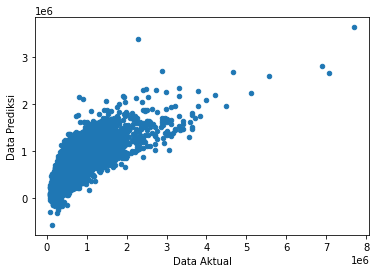

In [93]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()
# s=20 menunjukan size 

In [94]:
pred_test = Model.predict(X_test)

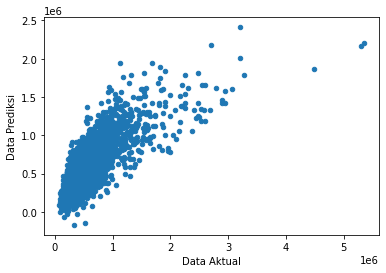

In [95]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

In [96]:
pd.concat([X_train, y_train],axis=1)

,bedrooms,bathrooms,sqft_living,grade,yr_built,price
8583,2,1,1930,8,1989,509000.0
19257,5,2,2570,8,1987,675000.0
1295,3,1,1150,6,1946,420000.0
15670,8,2,2530,7,1901,680000.0
3913,3,1,1240,8,1968,357823.0
...,...,...,...,...,...,...
16840,2,1,1230,9,2009,540000.0
11863,3,2,1910,8,1989,498688.0
17093,4,2,2100,8,1968,640000.0
8366,3,1,1610,7,1961,262500.0


Analisa error training set

In [97]:
Training_set = pd.concat([X_train, y_train],axis=1)

In [98]:
Testing_set = pd.concat([X_train, y_train],axis=1)

In [99]:
Training_set['price_pred'] = pred_train
Training_set

,bedrooms,bathrooms,sqft_living,grade,yr_built,price,price_pred
8583,2,1,1930,8,1989,509000.0,509573.848088
19257,5,2,2570,8,1987,675000.0,543888.187291
1295,3,1,1150,6,1946,420000.0,217272.084757
15670,8,2,2530,7,1901,680000.0,587237.672508
3913,3,1,1240,8,1968,357823.0,409525.426283
...,...,...,...,...,...,...,...
16840,2,1,1230,9,2009,540000.0,429237.092764
11863,3,2,1910,8,1989,498688.0,517392.466083
17093,4,2,2100,8,1968,640000.0,583584.196097
8366,3,1,1610,7,1961,262500.0,375917.866586


In [102]:
Training_set['Error'] = abs(Training_set['price'] -Training_set['price_pred']) 

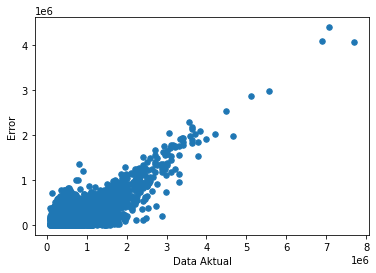

In [103]:
plt.scatter(Training_set['price'], Training_set['Error'], s=30)
plt.xlabel("Data Aktual")
plt.ylabel("Error")
plt.show()

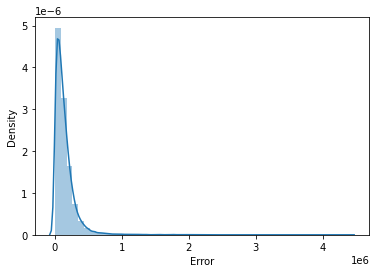

In [104]:
sns.distplot(Training_set['Error'])
plt.show()

In [105]:
Training_set['Error'].mean()

145758.21263200828

In [106]:
Training_set.sort_values('Error', ascending=False).head(10)

,bedrooms,bathrooms,sqft_living,grade,yr_built,price,price_pred,Error
3914,5,4,10040,11,1940,7062500.0,2.664799e+06,4.397701e+06
9254,6,7,9890,13,2001,6885000.0,2.797816e+06,4.087184e+06
7252,6,8,12050,13,1910,7700000.0,3.631748e+06,4.068252e+06
4411,5,5,9200,13,2001,5570000.0,2.591213e+06,2.978787e+06
1164,5,5,8010,12,1999,5110800.0,2.243059e+06,2.867741e+06
2626,5,5,6640,12,2004,4500000.0,1.964406e+06,2.535594e+06
21576,5,4,4850,10,2007,3567000.0,1.287109e+06,2.279891e+06
15255,4,3,4830,11,1990,3640900.0,1.470507e+06,2.170393e+06
18482,5,3,5020,12,2007,3650000.0,1.517147e+06,2.132853e+06
2085,4,4,5770,11,1980,3850000.0,1.752436e+06,2.097564e+06


In [107]:
error_train = abs(y_train - pred_train)

In [108]:
error_test = abs(y_test - pred_test)

# Evaluation Matrix Calculation

In [109]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error

## Evaluation untuk data training

In [110]:
y_train

8583     509000.0
19257    675000.0
1295     420000.0
15670    680000.0
3913     357823.0
           ...   
16840    540000.0
11863    498688.0
17093    640000.0
8366     262500.0
17530    870000.0
Name: price, Length: 17290, dtype: float64

In [112]:
pred_train = Model.predict(X_train)

In [113]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.6188434181757463

In [114]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

145758.21263200822

In [115]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

51888750957.394844

In [116]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

227791.0247516237

In [117]:
print("Hasil Evaluation Matrix untuk Data Training")
print(("*" *50),("*" *50))
print("Nilai R Squared : ", r2_train.round(2))
print("Nilai MAE : ", MAE_train.round(2))
print("Nilai MSE : ", MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
************************************************** **************************************************
Nilai R Squared :  0.62
Nilai MAE :  145758.21
Nilai MSE :  51888750957.39
Nilai RMSE :  227791.02


## Evaluation untuk data testing

In [118]:
y_test
#kunci jawaban/ujian sesungguhnya

13248    311100.0
5309     535000.0
10962    271000.0
20976    705000.0
19957    840000.0
           ...   
8527     610000.0
16521    187000.0
17198    305000.0
7539     809000.0
4853     840000.0
Name: price, Length: 4323, dtype: float64

In [119]:
pred_test = Model.predict(X_test)
# Model menjawab ujian sesungguhnya -> model memprediksi data testing

In [120]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.6125113286941102

In [121]:
MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

145394.52433687972

In [122]:
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

50117484545.41469

In [123]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

223869.34704290066

In [124]:
print("Hasil Evaluation Matrix untuk Data Test")
print(("*" *50),("*" *50))
print("Nilai R Squared : ", r2_test.round(2))
print("Nilai MAE : ", MAE_test.round(2))
print("Nilai MSE : ", MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
************************************************** **************************************************
Nilai R Squared :  0.61
Nilai MAE :  145394.52
Nilai MSE :  50117484545.41
Nilai RMSE :  223869.35


In [125]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train,RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test,RMSE_test]
}

In [126]:
pd.DataFrame(data, index=["R Squared","MAE","MSE","RMSE"])
# membandingkan training dan testing
# hasilnuya jelek(underfitting)

,Training,Testing
R Squared,6.188434e-01,6.125113e-01
MAE,1.457582e+05,1.453945e+05
MSE,5.188875e+10,5.011748e+10
RMSE,2.277910e+05,2.238693e+05


Hasil dari evaluasi matrix hasil R squared dan Error masih jauh dari bagus. Diperlukan improvement agara nilai R squared bisa mendekati 0.9 at least.